# MLP testing notebook
I trained the smaller models on a smaller amount of data to find optimum hyperparameters. Once the best settings were found I used this on bigger models trained with more data using a GPU. 

In [2]:
import numpy as np
import sys
sys.path.append('..')
import MLPfunctions as mlp
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import importlib


from importlib import reload
from sklearn.model_selection import train_test_split

# Create a dataframe from the csv file
dataset = pd.read_csv('../dataset/HIGGS_train.csv')
# Make the dataset much smaller
dataset_small = dataset.sample(frac=0.1)
# Set aside a validation set
data_val = dataset_small.sample(frac=0.2)
dataset_small.drop(data_val.index, inplace=True)
X_val = data_val.iloc[:, 1:].values
y_val = data_val.iloc[:, 0].values
# Split the data into features and labels
X = dataset_small.iloc[:, 1:].values
y = dataset_small.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Print all the sizes
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train,)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)


(563200, 28)
(140800, 28)
(176000, 28)


Epoch 1/1000, Train Loss: 0.6920670866966248, Test Loss: 0.738484799861908
Epoch 2/1000, Train Loss: 0.7375934720039368, Test Loss: 0.784781813621521
Epoch 3/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 4/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 5/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 6/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 7/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 8/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 9/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 10/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 11/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 12/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 13/1000, Train Loss: 0.783041775226593, Test Loss: 0.784781813621521
Epoch 14/1000, Train Loss: 0.783

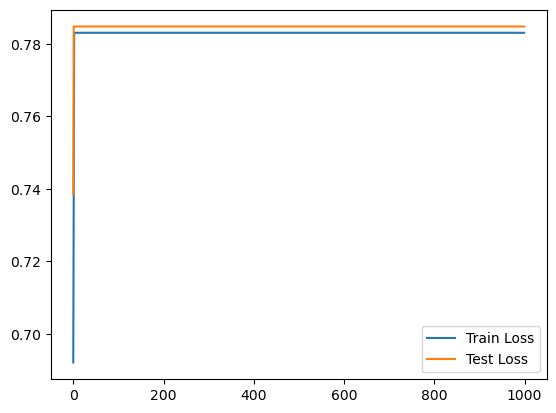

F1:0.6920624540178205
Accuracy:0.529125
Confusion Matrix:
[[    0 82874]
 [    0 93126]]


In [4]:
# Create the model
hidden_size = 50
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .1
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)


In [11]:
# Create the model
hidden_size = 30
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .005
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Epoch 1/1000, Train Loss: 0.6965864896774292, Test Loss: 0.6964472532272339
Epoch 2/1000, Train Loss: 0.6965609192848206, Test Loss: 0.6964225172996521
Epoch 3/1000, Train Loss: 0.6965355277061462, Test Loss: 0.6963980197906494
Epoch 4/1000, Train Loss: 0.6965101957321167, Test Loss: 0.6963735818862915
Epoch 5/1000, Train Loss: 0.6964849829673767, Test Loss: 0.6963492035865784
Epoch 6/1000, Train Loss: 0.6964598298072815, Test Loss: 0.6963250041007996
Epoch 7/1000, Train Loss: 0.6964347958564758, Test Loss: 0.6963009834289551
Epoch 8/1000, Train Loss: 0.6964100003242493, Test Loss: 0.6962769031524658
Epoch 9/1000, Train Loss: 0.6963852047920227, Test Loss: 0.6962530612945557
Epoch 10/1000, Train Loss: 0.6963606476783752, Test Loss: 0.6962293386459351
Epoch 11/1000, Train Loss: 0.6963361501693726, Test Loss: 0.6962056756019592
Epoch 12/1000, Train Loss: 0.6963118314743042, Test Loss: 0.696182131767273
Epoch 13/1000, Train Loss: 0.6962874531745911, Test Loss: 0.6961587071418762
Epoch 14/

KeyboardInterrupt: 

Epoch 1/1000, Train Loss: 0.6912761330604553, Test Loss: 0.6911388635635376
Epoch 2/1000, Train Loss: 0.6911003589630127, Test Loss: 0.6909878849983215
Epoch 3/1000, Train Loss: 0.6909376382827759, Test Loss: 0.6908478736877441
Epoch 4/1000, Train Loss: 0.6907857060432434, Test Loss: 0.6907145977020264
Epoch 5/1000, Train Loss: 0.6906409859657288, Test Loss: 0.6905848383903503
Epoch 6/1000, Train Loss: 0.6905007362365723, Test Loss: 0.6904554963111877
Epoch 7/1000, Train Loss: 0.690361738204956, Test Loss: 0.6903238296508789
Epoch 8/1000, Train Loss: 0.6902217864990234, Test Loss: 0.6901881694793701
Epoch 9/1000, Train Loss: 0.6900787949562073, Test Loss: 0.690047025680542
Epoch 10/1000, Train Loss: 0.6899310350418091, Test Loss: 0.689899206161499
Epoch 11/1000, Train Loss: 0.6897777915000916, Test Loss: 0.6897435188293457
Epoch 12/1000, Train Loss: 0.6896183490753174, Test Loss: 0.6895796060562134
Epoch 13/1000, Train Loss: 0.6894519329071045, Test Loss: 0.6894071102142334
Epoch 14/10

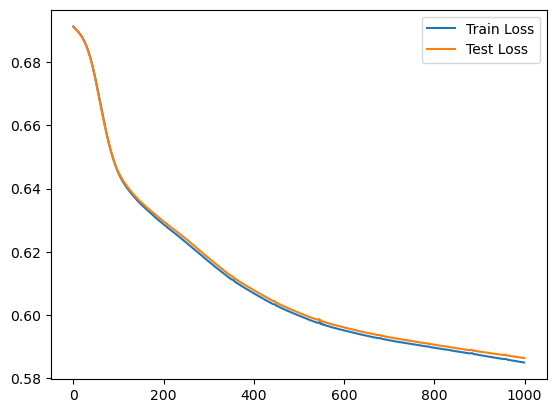

F1:0.7271328855524825
Accuracy:0.7056988636363636
Confusion Matrix:
[[55189 27685]
 [24112 69014]]


In [12]:
# Create the model
reload(mlp)
hidden_size = 30
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Learning Rate: 0.000010
Epoch 1/100, Train Loss: 0.6920732855796814, Test Loss: 0.6920447945594788
Epoch 2/100, Train Loss: 0.6920707821846008, Test Loss: 0.6920422911643982
Epoch 3/100, Train Loss: 0.6920680999755859, Test Loss: 0.6920396089553833
Epoch 4/100, Train Loss: 0.6920654773712158, Test Loss: 0.6920369863510132
Epoch 5/100, Train Loss: 0.6920628547668457, Test Loss: 0.6920344829559326
Epoch 6/100, Train Loss: 0.6920602917671204, Test Loss: 0.6920318603515625
Epoch 7/100, Train Loss: 0.6920576691627502, Test Loss: 0.6920293569564819
Epoch 8/100, Train Loss: 0.6920550465583801, Test Loss: 0.6920267939567566
Epoch 9/100, Train Loss: 0.6920525431632996, Test Loss: 0.6920242309570312
Epoch 10/100, Train Loss: 0.6920499205589294, Test Loss: 0.6920216679573059
Epoch 11/100, Train Loss: 0.6920472979545593, Test Loss: 0.6920190453529358
Epoch 12/100, Train Loss: 0.692044734954834, Test Loss: 0.6920165419578552
Epoch 13/100, Train Loss: 0.6920421719551086, Test Loss: 0.692013919353485

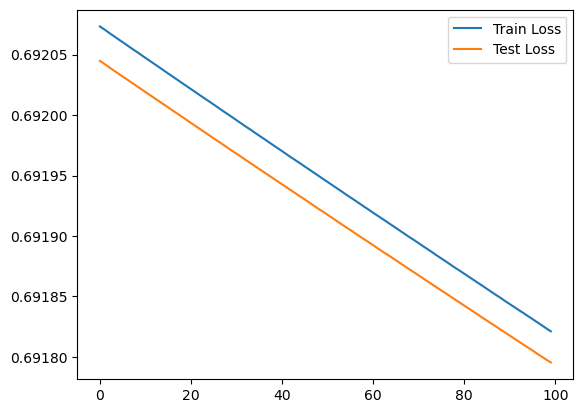

F1:0.6911136460220537
Accuracy:0.5292045454545454
Confusion Matrix:
[[  443 82302]
 [  558 92697]]

Learning Rate: 0.000015
Epoch 1/100, Train Loss: 0.6916468739509583, Test Loss: 0.6914607286453247
Epoch 2/100, Train Loss: 0.6916412115097046, Test Loss: 0.6914553046226501
Epoch 3/100, Train Loss: 0.6916355490684509, Test Loss: 0.6914498805999756
Epoch 4/100, Train Loss: 0.691629946231842, Test Loss: 0.6914443969726562
Epoch 5/100, Train Loss: 0.6916242837905884, Test Loss: 0.6914390325546265
Epoch 6/100, Train Loss: 0.6916186809539795, Test Loss: 0.6914336085319519
Epoch 7/100, Train Loss: 0.6916130781173706, Test Loss: 0.6914281845092773
Epoch 8/100, Train Loss: 0.6916074156761169, Test Loss: 0.6914227604866028
Epoch 9/100, Train Loss: 0.6916018724441528, Test Loss: 0.6914173364639282
Epoch 10/100, Train Loss: 0.6915962100028992, Test Loss: 0.6914119124412537
Epoch 11/100, Train Loss: 0.6915906071662903, Test Loss: 0.6914066076278687
Epoch 12/100, Train Loss: 0.6915850639343262, Test

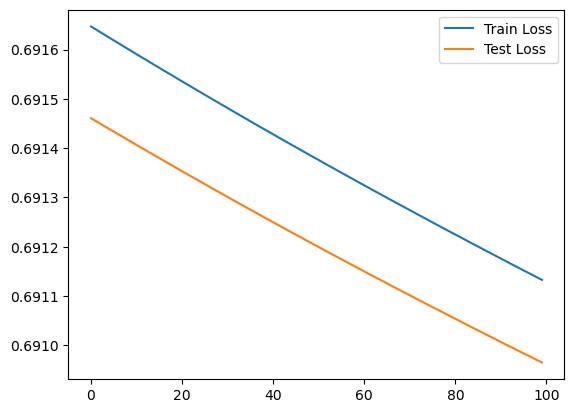

F1:0.6927905974651194
Accuracy:0.5301022727272727
Confusion Matrix:
[[   47 82698]
 [    4 93251]]

Learning Rate: 0.000023
Epoch 1/100, Train Loss: 0.699714720249176, Test Loss: 0.6998189687728882
Epoch 2/100, Train Loss: 0.6996841430664062, Test Loss: 0.6997880935668945
Epoch 3/100, Train Loss: 0.6996536254882812, Test Loss: 0.6997573971748352
Epoch 4/100, Train Loss: 0.6996232271194458, Test Loss: 0.6997266411781311
Epoch 5/100, Train Loss: 0.6995928883552551, Test Loss: 0.6996961832046509
Epoch 6/100, Train Loss: 0.699562668800354, Test Loss: 0.6996656656265259
Epoch 7/100, Train Loss: 0.6995325088500977, Test Loss: 0.6996351480484009
Epoch 8/100, Train Loss: 0.6995025277137756, Test Loss: 0.699604868888855
Epoch 9/100, Train Loss: 0.6994724273681641, Test Loss: 0.6995748281478882
Epoch 10/100, Train Loss: 0.6994425654411316, Test Loss: 0.6995446085929871
Epoch 11/100, Train Loss: 0.6994128227233887, Test Loss: 0.6995145678520203
Epoch 12/100, Train Loss: 0.6993830800056458, Test L

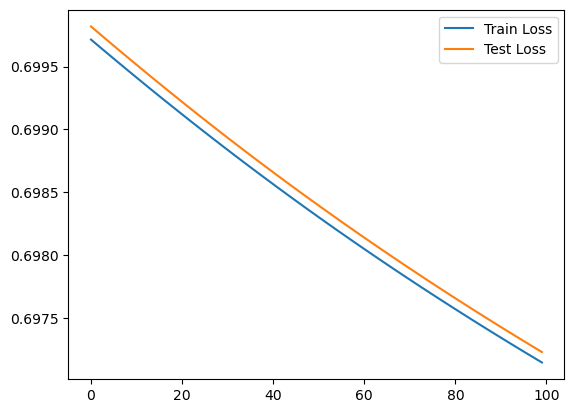

F1:0.05106408877888458
Accuracy:0.46847727272727274
Confusion Matrix:
[[79935  2810]
 [90738  2517]]

Learning Rate: 0.000034
Epoch 1/100, Train Loss: 0.6988587379455566, Test Loss: 0.6987537145614624
Epoch 2/100, Train Loss: 0.6988081336021423, Test Loss: 0.6987029314041138
Epoch 3/100, Train Loss: 0.6987577080726624, Test Loss: 0.6986522674560547
Epoch 4/100, Train Loss: 0.6987074613571167, Test Loss: 0.6986019611358643
Epoch 5/100, Train Loss: 0.6986575722694397, Test Loss: 0.6985517740249634
Epoch 6/100, Train Loss: 0.6986076831817627, Test Loss: 0.6985018253326416
Epoch 7/100, Train Loss: 0.6985580325126648, Test Loss: 0.6984521150588989
Epoch 8/100, Train Loss: 0.698508620262146, Test Loss: 0.6984025239944458
Epoch 9/100, Train Loss: 0.6984594464302063, Test Loss: 0.6983532905578613
Epoch 10/100, Train Loss: 0.6984104514122009, Test Loss: 0.6983041763305664
Epoch 11/100, Train Loss: 0.6983615756034851, Test Loss: 0.6982553005218506
Epoch 12/100, Train Loss: 0.6983129382133484, Te

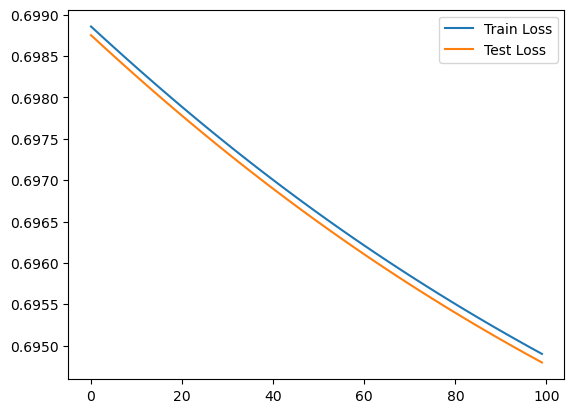

F1:0.39045609257998637
Accuracy:0.49123863636363635
Confusion Matrix:
[[57779 24966]
 [64576 28679]]

Learning Rate: 0.000051
Epoch 1/100, Train Loss: 0.6927077770233154, Test Loss: 0.6924999356269836
Epoch 2/100, Train Loss: 0.6926828622817993, Test Loss: 0.6924759745597839
Epoch 3/100, Train Loss: 0.6926582455635071, Test Loss: 0.6924521923065186
Epoch 4/100, Train Loss: 0.6926336884498596, Test Loss: 0.692428708076477
Epoch 5/100, Train Loss: 0.6926092505455017, Test Loss: 0.6924052834510803
Epoch 6/100, Train Loss: 0.6925851702690125, Test Loss: 0.6923820972442627
Epoch 7/100, Train Loss: 0.692561149597168, Test Loss: 0.6923591494560242
Epoch 8/100, Train Loss: 0.6925373673439026, Test Loss: 0.6923363208770752
Epoch 9/100, Train Loss: 0.6925137639045715, Test Loss: 0.6923136711120605
Epoch 10/100, Train Loss: 0.6924903988838196, Test Loss: 0.692291259765625
Epoch 11/100, Train Loss: 0.6924671530723572, Test Loss: 0.692268967628479
Epoch 12/100, Train Loss: 0.6924440264701843, Test 

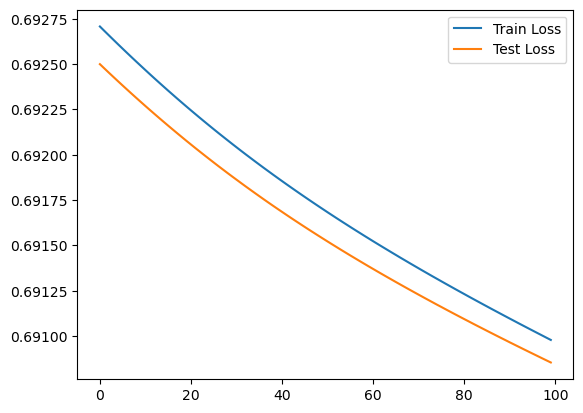

F1:0.6926890865536388
Accuracy:0.5298579545454546
Confusion Matrix:
[[    0 82745]
 [    0 93255]]

Learning Rate: 0.000076
Epoch 1/100, Train Loss: 0.6912233233451843, Test Loss: 0.6911460161209106
Epoch 2/100, Train Loss: 0.691200315952301, Test Loss: 0.6911236643791199
Epoch 3/100, Train Loss: 0.6911775469779968, Test Loss: 0.6911014914512634
Epoch 4/100, Train Loss: 0.6911547780036926, Test Loss: 0.6910795569419861
Epoch 5/100, Train Loss: 0.6911323666572571, Test Loss: 0.6910578012466431
Epoch 6/100, Train Loss: 0.6911100745201111, Test Loss: 0.6910361647605896
Epoch 7/100, Train Loss: 0.6910879015922546, Test Loss: 0.6910147070884705
Epoch 8/100, Train Loss: 0.6910660862922668, Test Loss: 0.6909934878349304
Epoch 9/100, Train Loss: 0.6910443305969238, Test Loss: 0.6909722089767456
Epoch 10/100, Train Loss: 0.6910227537155151, Test Loss: 0.6909512877464294
Epoch 11/100, Train Loss: 0.6910012364387512, Test Loss: 0.6909303665161133
Epoch 12/100, Train Loss: 0.690980076789856, Test 

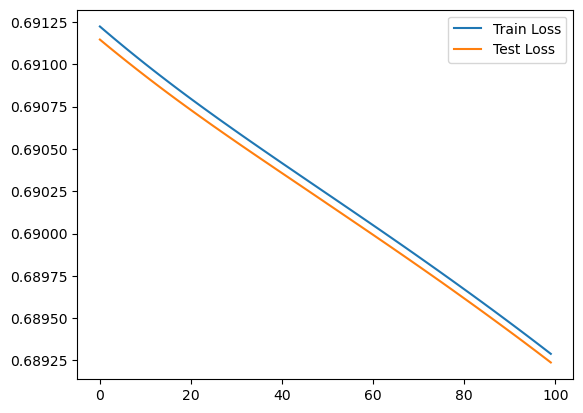

F1:0.6922731961074488
Accuracy:0.5321363636363636
Confusion Matrix:
[[ 1034 81711]
 [  633 92622]]

Learning Rate: 0.000114
Epoch 1/100, Train Loss: 0.6925663352012634, Test Loss: 0.6924561262130737
Epoch 2/100, Train Loss: 0.6925176382064819, Test Loss: 0.6924076080322266
Epoch 3/100, Train Loss: 0.6924694180488586, Test Loss: 0.6923597455024719
Epoch 4/100, Train Loss: 0.6924221515655518, Test Loss: 0.6923125386238098
Epoch 5/100, Train Loss: 0.6923753619194031, Test Loss: 0.6922661662101746
Epoch 6/100, Train Loss: 0.6923295855522156, Test Loss: 0.6922206282615662
Epoch 7/100, Train Loss: 0.6922844052314758, Test Loss: 0.6921759247779846
Epoch 8/100, Train Loss: 0.6922399997711182, Test Loss: 0.6921319365501404
Epoch 9/100, Train Loss: 0.6921961903572083, Test Loss: 0.6920887231826782
Epoch 10/100, Train Loss: 0.6921532154083252, Test Loss: 0.6920464038848877
Epoch 11/100, Train Loss: 0.6921109557151794, Test Loss: 0.6920045614242554
Epoch 12/100, Train Loss: 0.6920692324638367, Tes

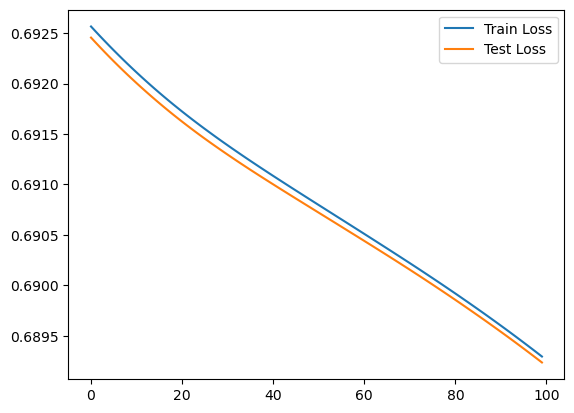

F1:0.6927468573679946
Accuracy:0.5303181818181818
Confusion Matrix:
[[  147 82598]
 [   66 93189]]

Learning Rate: 0.000171
Epoch 1/100, Train Loss: 0.6947070360183716, Test Loss: 0.6947007775306702
Epoch 2/100, Train Loss: 0.6945517659187317, Test Loss: 0.6945469379425049
Epoch 3/100, Train Loss: 0.6944003701210022, Test Loss: 0.69439697265625
Epoch 4/100, Train Loss: 0.6942524313926697, Test Loss: 0.6942506432533264
Epoch 5/100, Train Loss: 0.6941084265708923, Test Loss: 0.694108247756958
Epoch 6/100, Train Loss: 0.6939684152603149, Test Loss: 0.6939697861671448
Epoch 7/100, Train Loss: 0.6938320994377136, Test Loss: 0.6938352584838867
Epoch 8/100, Train Loss: 0.6937000155448914, Test Loss: 0.6937047243118286
Epoch 9/100, Train Loss: 0.6935716867446899, Test Loss: 0.6935780644416809
Epoch 10/100, Train Loss: 0.693447470664978, Test Loss: 0.6934554576873779
Epoch 11/100, Train Loss: 0.6933271884918213, Test Loss: 0.6933364868164062
Epoch 12/100, Train Loss: 0.693210780620575, Test Los

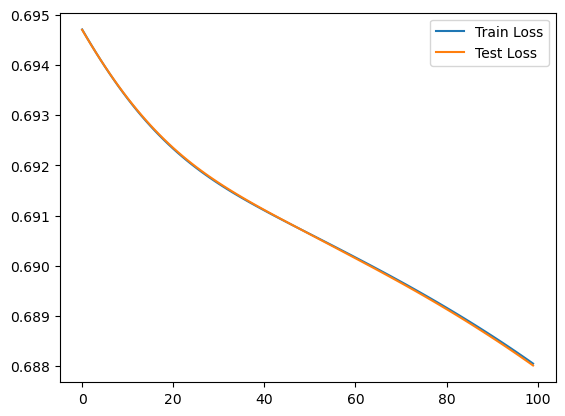

F1:0.6815175042177619
Accuracy:0.5527329545454546
Confusion Matrix:
[[13056 69689]
 [ 9030 84225]]

Learning Rate: 0.000256
Epoch 1/100, Train Loss: 0.6911377310752869, Test Loss: 0.6910117864608765
Epoch 2/100, Train Loss: 0.6910721659660339, Test Loss: 0.6909483075141907
Epoch 3/100, Train Loss: 0.6910074949264526, Test Loss: 0.6908854246139526
Epoch 4/100, Train Loss: 0.6909437775611877, Test Loss: 0.6908235549926758
Epoch 5/100, Train Loss: 0.6908807754516602, Test Loss: 0.6907625198364258
Epoch 6/100, Train Loss: 0.6908187866210938, Test Loss: 0.690702497959137
Epoch 7/100, Train Loss: 0.6907575130462646, Test Loss: 0.6906428933143616
Epoch 8/100, Train Loss: 0.6906967163085938, Test Loss: 0.6905837655067444
Epoch 9/100, Train Loss: 0.6906365156173706, Test Loss: 0.6905251741409302
Epoch 10/100, Train Loss: 0.6905767917633057, Test Loss: 0.6904670000076294
Epoch 11/100, Train Loss: 0.6905175447463989, Test Loss: 0.6904096007347107
Epoch 12/100, Train Loss: 0.6904587745666504, Test

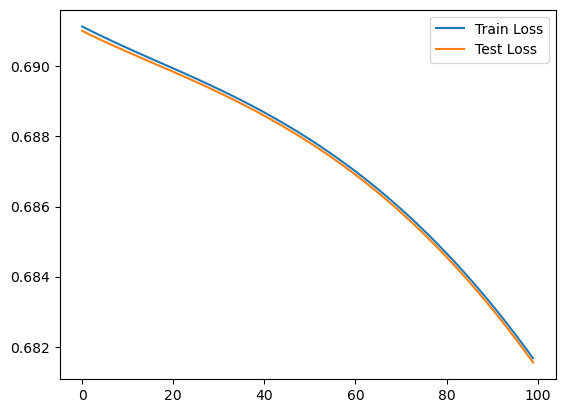

F1:0.6719261261494289
Accuracy:0.5676079545454545
Confusion Matrix:
[[21968 60777]
 [15324 77931]]

Learning Rate: 0.000384
Epoch 1/100, Train Loss: 0.6995184421539307, Test Loss: 0.6993208527565002
Epoch 2/100, Train Loss: 0.6992214918136597, Test Loss: 0.699029803276062
Epoch 3/100, Train Loss: 0.6989325284957886, Test Loss: 0.6987467408180237
Epoch 4/100, Train Loss: 0.6986513137817383, Test Loss: 0.6984720230102539
Epoch 5/100, Train Loss: 0.6983779668807983, Test Loss: 0.6982049345970154
Epoch 6/100, Train Loss: 0.6981124877929688, Test Loss: 0.6979454755783081
Epoch 7/100, Train Loss: 0.6978545188903809, Test Loss: 0.6976937651634216
Epoch 8/100, Train Loss: 0.6976037621498108, Test Loss: 0.6974495053291321
Epoch 9/100, Train Loss: 0.697360098361969, Test Loss: 0.697212278842926
Epoch 10/100, Train Loss: 0.6971235871315002, Test Loss: 0.6969817280769348
Epoch 11/100, Train Loss: 0.6968938112258911, Test Loss: 0.6967572569847107
Epoch 12/100, Train Loss: 0.6966707706451416, Test L

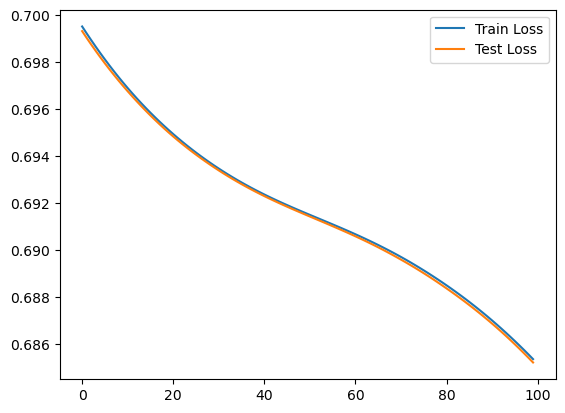

F1:0.6889482557808058
Accuracy:0.5660227272727273
Confusion Matrix:
[[15033 67712]
 [ 8668 84587]]

Learning Rate: 0.000577
Epoch 1/100, Train Loss: 0.7007761597633362, Test Loss: 0.700233519077301
Epoch 2/100, Train Loss: 0.700136125087738, Test Loss: 0.6996194124221802
Epoch 3/100, Train Loss: 0.6995315551757812, Test Loss: 0.6990383267402649
Epoch 4/100, Train Loss: 0.6989604830741882, Test Loss: 0.6984890699386597
Epoch 5/100, Train Loss: 0.6984210014343262, Test Loss: 0.6979701519012451
Epoch 6/100, Train Loss: 0.6979116201400757, Test Loss: 0.6974798440933228
Epoch 7/100, Train Loss: 0.6974305510520935, Test Loss: 0.6970171332359314
Epoch 8/100, Train Loss: 0.6969764828681946, Test Loss: 0.6965805292129517
Epoch 9/100, Train Loss: 0.6965479850769043, Test Loss: 0.6961678266525269
Epoch 10/100, Train Loss: 0.6961441040039062, Test Loss: 0.6957792043685913
Epoch 11/100, Train Loss: 0.6957639455795288, Test Loss: 0.6954135298728943
Epoch 12/100, Train Loss: 0.6954066157341003, Test 

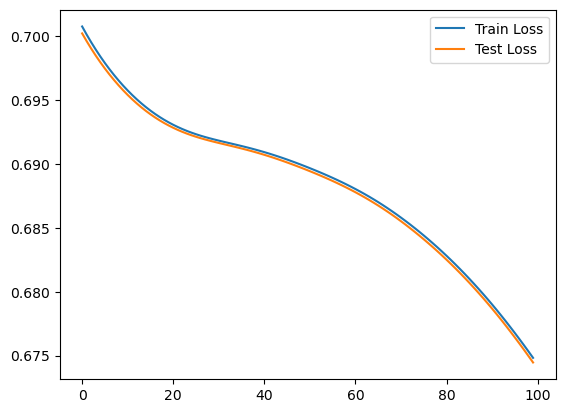

F1:0.6725597654898675
Accuracy:0.5912727272727273
Confusion Matrix:
[[30186 52559]
 [19377 73878]]

Learning Rate: 0.000865
Epoch 1/100, Train Loss: 0.6919414401054382, Test Loss: 0.6916456818580627
Epoch 2/100, Train Loss: 0.6916178464889526, Test Loss: 0.691356360912323
Epoch 3/100, Train Loss: 0.6913329362869263, Test Loss: 0.6911001801490784
Epoch 4/100, Train Loss: 0.6910794973373413, Test Loss: 0.6908702254295349
Epoch 5/100, Train Loss: 0.6908507347106934, Test Loss: 0.6906598806381226
Epoch 6/100, Train Loss: 0.6906404495239258, Test Loss: 0.6904626488685608
Epoch 7/100, Train Loss: 0.6904420852661133, Test Loss: 0.6902718544006348
Epoch 8/100, Train Loss: 0.6902499794960022, Test Loss: 0.6900835037231445
Epoch 9/100, Train Loss: 0.6900596618652344, Test Loss: 0.6898941397666931
Epoch 10/100, Train Loss: 0.6898672580718994, Test Loss: 0.6897004246711731
Epoch 11/100, Train Loss: 0.6896706223487854, Test Loss: 0.6895009279251099
Epoch 12/100, Train Loss: 0.6894677877426147, Test

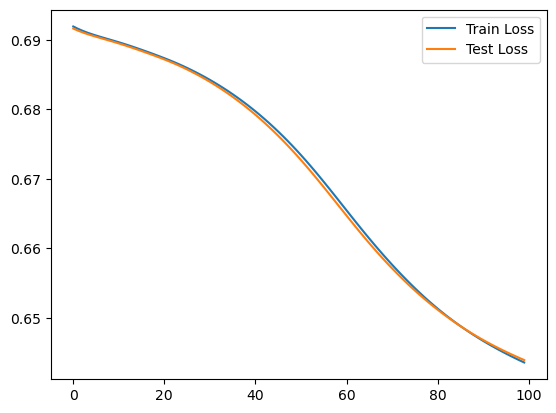

F1:0.6798203178991016
Accuracy:0.631465909090909
Confusion Matrix:
[[42279 40466]
 [24396 68859]]

Learning Rate: 0.001297
Epoch 1/100, Train Loss: 0.6935544610023499, Test Loss: 0.6927084922790527
Epoch 2/100, Train Loss: 0.6926787495613098, Test Loss: 0.6920809745788574
Epoch 3/100, Train Loss: 0.6920682787895203, Test Loss: 0.6916356682777405
Epoch 4/100, Train Loss: 0.6916371583938599, Test Loss: 0.6912853121757507
Epoch 5/100, Train Loss: 0.6912967562675476, Test Loss: 0.690964937210083
Epoch 6/100, Train Loss: 0.6909843683242798, Test Loss: 0.6906429529190063
Epoch 7/100, Train Loss: 0.6906661987304688, Test Loss: 0.6903079152107239
Epoch 8/100, Train Loss: 0.6903301477432251, Test Loss: 0.6899601221084595
Epoch 9/100, Train Loss: 0.6899785995483398, Test Loss: 0.6896067261695862
Epoch 10/100, Train Loss: 0.6896205544471741, Test Loss: 0.68925541639328
Epoch 11/100, Train Loss: 0.6892650127410889, Test Loss: 0.6889115571975708
Epoch 12/100, Train Loss: 0.6889157295227051, Test Lo

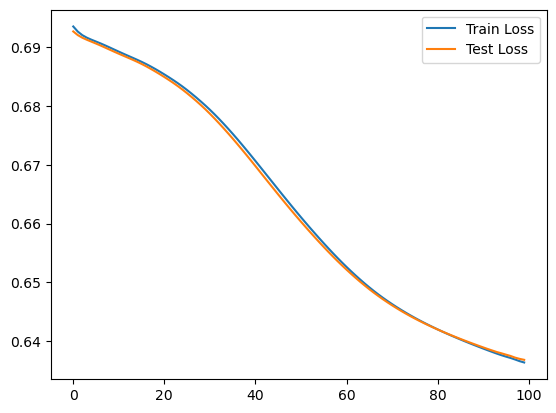

F1:0.688898190323772
Accuracy:0.6410397727272727
Confusion Matrix:
[[42874 39871]
 [23306 69949]]

Learning Rate: 0.001946
Epoch 1/100, Train Loss: 0.6950602531433105, Test Loss: 0.6933836936950684
Epoch 2/100, Train Loss: 0.6933919191360474, Test Loss: 0.6922407746315002
Epoch 3/100, Train Loss: 0.692245364189148, Test Loss: 0.6914819478988647
Epoch 4/100, Train Loss: 0.6914806365966797, Test Loss: 0.6909773349761963
Epoch 5/100, Train Loss: 0.6909725069999695, Test Loss: 0.6906241774559021
Epoch 6/100, Train Loss: 0.6906170845031738, Test Loss: 0.6903375387191772
Epoch 7/100, Train Loss: 0.6903271675109863, Test Loss: 0.6900510191917419
Epoch 8/100, Train Loss: 0.6900358200073242, Test Loss: 0.6897199749946594
Epoch 9/100, Train Loss: 0.6896990537643433, Test Loss: 0.6893258094787598
Epoch 10/100, Train Loss: 0.689298152923584, Test Loss: 0.6888692378997803
Epoch 11/100, Train Loss: 0.6888329982757568, Test Loss: 0.6883677244186401
Epoch 12/100, Train Loss: 0.6883208155632019, Test L

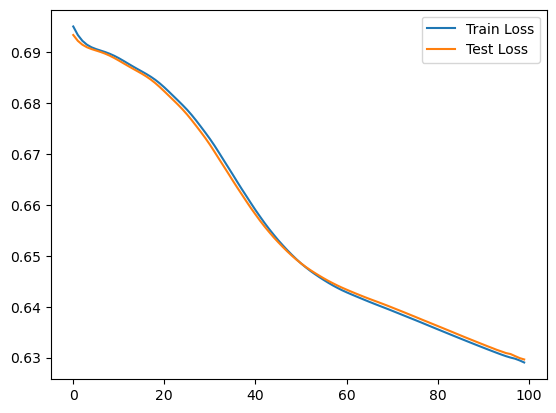

F1:0.6942582018582258
Accuracy:0.6507386363636364
Confusion Matrix:
[[44739 38006]
 [23464 69791]]

Learning Rate: 0.002919
Epoch 1/100, Train Loss: 0.6920603513717651, Test Loss: 0.6908935308456421
Epoch 2/100, Train Loss: 0.6909158229827881, Test Loss: 0.6903489828109741
Epoch 3/100, Train Loss: 0.6903994083404541, Test Loss: 0.6899752616882324
Epoch 4/100, Train Loss: 0.6900346279144287, Test Loss: 0.6895533204078674
Epoch 5/100, Train Loss: 0.6896096467971802, Test Loss: 0.6890299320220947
Epoch 6/100, Train Loss: 0.6890736818313599, Test Loss: 0.6884200572967529
Epoch 7/100, Train Loss: 0.6884456276893616, Test Loss: 0.6877596378326416
Epoch 8/100, Train Loss: 0.6877617835998535, Test Loss: 0.6870698928833008
Epoch 9/100, Train Loss: 0.6870455145835876, Test Loss: 0.6863399147987366
Epoch 10/100, Train Loss: 0.6862887144088745, Test Loss: 0.6855335235595703
Epoch 11/100, Train Loss: 0.6854546070098877, Test Loss: 0.6846132278442383
Epoch 12/100, Train Loss: 0.68450927734375, Test 

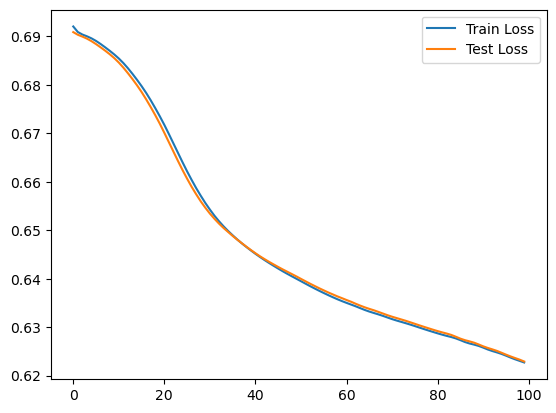

F1:0.6994099010495652
Accuracy:0.6587670454545455
Confusion Matrix:
[[46073 36672]
 [23385 69870]]

Learning Rate: 0.004379
Epoch 1/100, Train Loss: 0.698943555355072, Test Loss: 0.695724368095398
Epoch 2/100, Train Loss: 0.6957204937934875, Test Loss: 0.6937476396560669
Epoch 3/100, Train Loss: 0.693781852722168, Test Loss: 0.6928417086601257
Epoch 4/100, Train Loss: 0.6928945779800415, Test Loss: 0.6924780607223511
Epoch 5/100, Train Loss: 0.6925339698791504, Test Loss: 0.6920552253723145
Epoch 6/100, Train Loss: 0.6921096444129944, Test Loss: 0.6913483142852783
Epoch 7/100, Train Loss: 0.6913942098617554, Test Loss: 0.6904435157775879
Epoch 8/100, Train Loss: 0.690471351146698, Test Loss: 0.6894868016242981
Epoch 9/100, Train Loss: 0.6894936561584473, Test Loss: 0.6885677576065063
Epoch 10/100, Train Loss: 0.6885514259338379, Test Loss: 0.6876892447471619
Epoch 11/100, Train Loss: 0.687646746635437, Test Loss: 0.6867812871932983
Epoch 12/100, Train Loss: 0.6867244839668274, Test Los

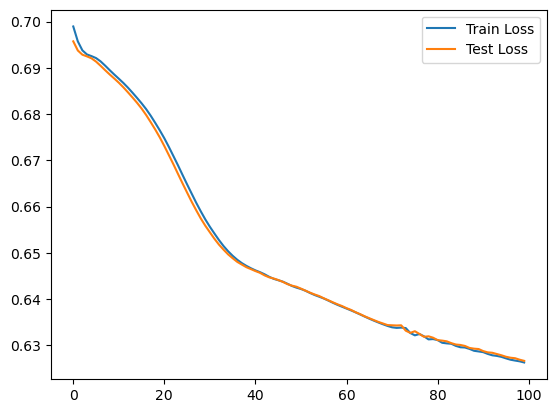

F1:0.697033443094773
Accuracy:0.6554943181818181
Confusion Matrix:
[[45618 37127]
 [23506 69749]]

Learning Rate: 0.006568
Epoch 1/100, Train Loss: 0.7053650617599487, Test Loss: 0.6991754770278931
Epoch 2/100, Train Loss: 0.6990813612937927, Test Loss: 0.695339024066925
Epoch 3/100, Train Loss: 0.695285975933075, Test Loss: 0.693122148513794
Epoch 4/100, Train Loss: 0.6931083798408508, Test Loss: 0.6921295523643494
Epoch 5/100, Train Loss: 0.6921398639678955, Test Loss: 0.6920229196548462
Epoch 6/100, Train Loss: 0.6920579671859741, Test Loss: 0.6917958855628967
Epoch 7/100, Train Loss: 0.6918296813964844, Test Loss: 0.6909696459770203
Epoch 8/100, Train Loss: 0.6909863948822021, Test Loss: 0.6898601651191711
Epoch 9/100, Train Loss: 0.6898508071899414, Test Loss: 0.688846230506897
Epoch 10/100, Train Loss: 0.6888249516487122, Test Loss: 0.688069760799408
Epoch 11/100, Train Loss: 0.6880353093147278, Test Loss: 0.6873726844787598
Epoch 12/100, Train Loss: 0.6873243451118469, Test Loss

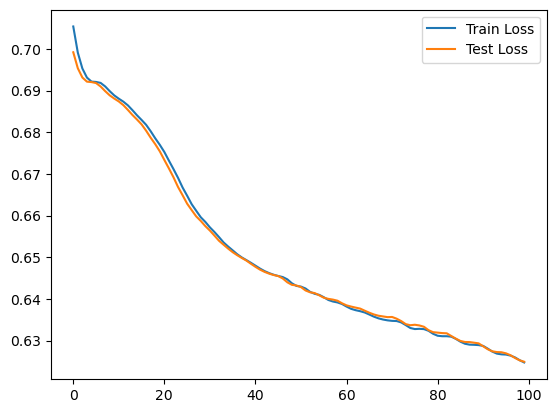

F1:0.697300829354109
Accuracy:0.6578295454545454
Confusion Matrix:
[[46414 36331]
 [23891 69364]]

Learning Rate: 0.009853
Epoch 1/100, Train Loss: 0.6965029239654541, Test Loss: 0.6920458674430847
Epoch 2/100, Train Loss: 0.6920560002326965, Test Loss: 0.6912757754325867
Epoch 3/100, Train Loss: 0.6912661790847778, Test Loss: 0.689705491065979
Epoch 4/100, Train Loss: 0.6896712183952332, Test Loss: 0.6879389882087708
Epoch 5/100, Train Loss: 0.6878684163093567, Test Loss: 0.6864610910415649
Epoch 6/100, Train Loss: 0.6863463521003723, Test Loss: 0.6848392486572266
Epoch 7/100, Train Loss: 0.6846991777420044, Test Loss: 0.6827388405799866
Epoch 8/100, Train Loss: 0.682609498500824, Test Loss: 0.6805901527404785
Epoch 9/100, Train Loss: 0.6804673671722412, Test Loss: 0.6782921552658081
Epoch 10/100, Train Loss: 0.6781550645828247, Test Loss: 0.6756223440170288
Epoch 11/100, Train Loss: 0.6754521727561951, Test Loss: 0.6731263399124146
Epoch 12/100, Train Loss: 0.6729112863540649, Test L

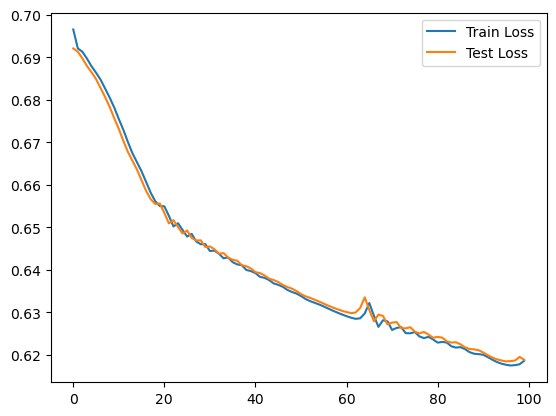

F1:0.6744237319899021
Accuracy:0.6643863636363636
Confusion Matrix:
[[55753 26992]
 [32076 61179]]

Learning Rate: 0.014779
Epoch 1/100, Train Loss: 0.6927067637443542, Test Loss: 0.6920138597488403
Epoch 2/100, Train Loss: 0.692014753818512, Test Loss: 0.6893869042396545
Epoch 3/100, Train Loss: 0.6894147992134094, Test Loss: 0.6891321539878845
Epoch 4/100, Train Loss: 0.6891560554504395, Test Loss: 0.6867713332176208
Epoch 5/100, Train Loss: 0.686759352684021, Test Loss: 0.6839710474014282
Epoch 6/100, Train Loss: 0.6838985681533813, Test Loss: 0.6820530891418457
Epoch 7/100, Train Loss: 0.681898295879364, Test Loss: 0.6773461699485779
Epoch 8/100, Train Loss: 0.6770724654197693, Test Loss: 0.6746255159378052
Epoch 9/100, Train Loss: 0.674180269241333, Test Loss: 0.6695917248725891
Epoch 10/100, Train Loss: 0.6690453290939331, Test Loss: 0.6673850417137146
Epoch 11/100, Train Loss: 0.666854977607727, Test Loss: 0.6647084951400757
Epoch 12/100, Train Loss: 0.6640914082527161, Test Los

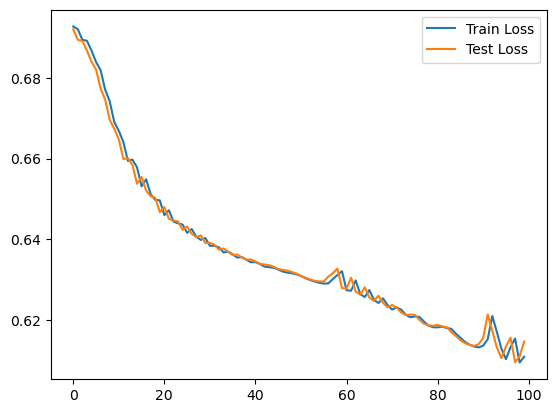

F1:0.7191535797314608
Accuracy:0.6636704545454546
Confusion Matrix:
[[41018 41727]
 [17467 75788]]

Learning Rate: 0.022168
Epoch 1/100, Train Loss: 0.6922606229782104, Test Loss: 0.6895774602890015
Epoch 2/100, Train Loss: 0.6896045804023743, Test Loss: 0.6920938491821289
Epoch 3/100, Train Loss: 0.6920218467712402, Test Loss: 0.6866919994354248
Epoch 4/100, Train Loss: 0.686608612537384, Test Loss: 0.6857835054397583
Epoch 5/100, Train Loss: 0.6856610774993896, Test Loss: 0.6846440434455872
Epoch 6/100, Train Loss: 0.6844803690910339, Test Loss: 0.6802136301994324
Epoch 7/100, Train Loss: 0.6800782680511475, Test Loss: 0.6792379021644592
Epoch 8/100, Train Loss: 0.6791281700134277, Test Loss: 0.6740368604660034
Epoch 9/100, Train Loss: 0.6738656759262085, Test Loss: 0.6724455952644348
Epoch 10/100, Train Loss: 0.6720935702323914, Test Loss: 0.6662007570266724
Epoch 11/100, Train Loss: 0.6658203601837158, Test Loss: 0.6666510105133057
Epoch 12/100, Train Loss: 0.6663669943809509, Test

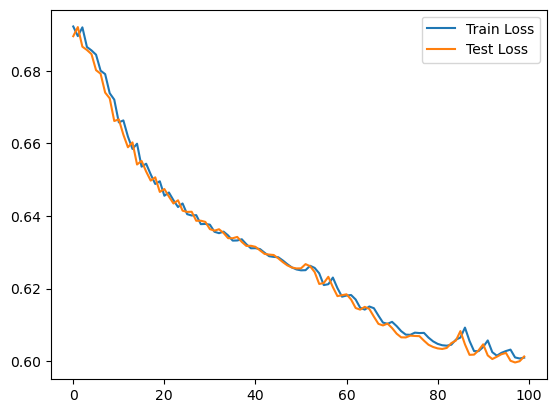

F1:0.6949666664831625
Accuracy:0.6851761363636364
Confusion Matrix:
[[57471 25274]
 [30135 63120]]

Learning Rate: 0.033253
Epoch 1/100, Train Loss: 0.6924590468406677, Test Loss: 0.730350911617279
Epoch 2/100, Train Loss: 0.7307721376419067, Test Loss: 0.6902467012405396
Epoch 3/100, Train Loss: 0.6902616620063782, Test Loss: 0.6917650699615479
Epoch 4/100, Train Loss: 0.6917231678962708, Test Loss: 0.6926831603050232
Epoch 5/100, Train Loss: 0.6926257014274597, Test Loss: 0.6915503740310669
Epoch 6/100, Train Loss: 0.691493809223175, Test Loss: 0.6899834871292114
Epoch 7/100, Train Loss: 0.6899551749229431, Test Loss: 0.6882428526878357
Epoch 8/100, Train Loss: 0.6882426142692566, Test Loss: 0.6863477230072021
Epoch 9/100, Train Loss: 0.6863569617271423, Test Loss: 0.6837576627731323
Epoch 10/100, Train Loss: 0.683764636516571, Test Loss: 0.6804589033126831
Epoch 11/100, Train Loss: 0.680442214012146, Test Loss: 0.6763070821762085
Epoch 12/100, Train Loss: 0.6762728691101074, Test Lo

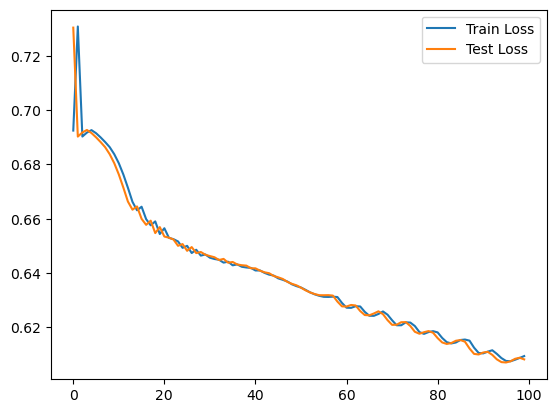

F1:0.6803331342341631
Accuracy:0.6776704545454545
Confusion Matrix:
[[58902 23843]
 [32887 60368]]

Learning Rate: 0.049879
Epoch 1/100, Train Loss: 0.6919843554496765, Test Loss: 0.7473780512809753
Epoch 2/100, Train Loss: 0.7471078038215637, Test Loss: 0.690910279750824
Epoch 3/100, Train Loss: 0.69096440076828, Test Loss: 0.6930356621742249
Epoch 4/100, Train Loss: 0.6931472420692444, Test Loss: 0.6922488808631897
Epoch 5/100, Train Loss: 0.6923364400863647, Test Loss: 0.6916556358337402
Epoch 6/100, Train Loss: 0.691717803478241, Test Loss: 0.6907748579978943
Epoch 7/100, Train Loss: 0.6907965540885925, Test Loss: 0.688744306564331
Epoch 8/100, Train Loss: 0.6887106895446777, Test Loss: 0.6853662133216858
Epoch 9/100, Train Loss: 0.6852330565452576, Test Loss: 0.6805217862129211
Epoch 10/100, Train Loss: 0.680311918258667, Test Loss: 0.6754646301269531
Epoch 11/100, Train Loss: 0.6751657128334045, Test Loss: 0.6797083020210266
Epoch 12/100, Train Loss: 0.6791784167289734, Test Loss

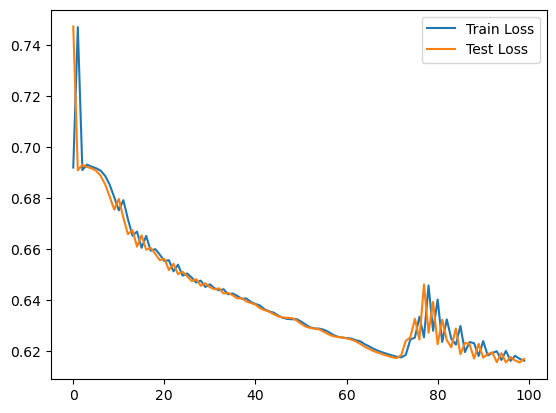

F1:0.707353479038779
Accuracy:0.6635795454545454
Confusion Matrix:
[[45232 37513]
 [21697 71558]]

Learning Rate: 0.074818
Epoch 1/100, Train Loss: 0.6957138776779175, Test Loss: 0.7595351934432983
Epoch 2/100, Train Loss: 0.7600457072257996, Test Loss: 0.6948200464248657
Epoch 3/100, Train Loss: 0.6949219703674316, Test Loss: 0.6941941976547241
Epoch 4/100, Train Loss: 0.6940974593162537, Test Loss: 0.6914961338043213
Epoch 5/100, Train Loss: 0.6915193796157837, Test Loss: 0.6902114152908325
Epoch 6/100, Train Loss: 0.6901583671569824, Test Loss: 0.6884520649909973
Epoch 7/100, Train Loss: 0.6882912516593933, Test Loss: 0.6880728602409363
Epoch 8/100, Train Loss: 0.6877740621566772, Test Loss: 0.6846436262130737
Epoch 9/100, Train Loss: 0.6844446659088135, Test Loss: 0.6835552453994751
Epoch 10/100, Train Loss: 0.6834099292755127, Test Loss: 0.6802789568901062
Epoch 11/100, Train Loss: 0.6800830960273743, Test Loss: 0.6791706681251526
Epoch 12/100, Train Loss: 0.6787440776824951, Test

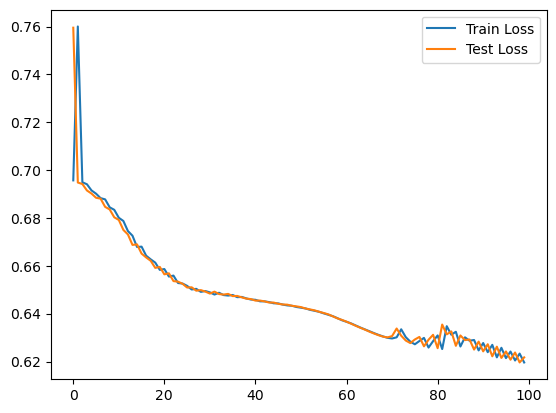

F1:0.7039580324776753
Accuracy:0.6575568181818182
Confusion Matrix:
[[44072 38673]
 [21597 71658]]

Learning Rate: 0.112227
Epoch 1/100, Train Loss: 0.6925758123397827, Test Loss: 0.8418400883674622
Epoch 2/100, Train Loss: 0.8413945436477661, Test Loss: 0.6916369199752808
Epoch 3/100, Train Loss: 0.691533088684082, Test Loss: 0.7138181924819946
Epoch 4/100, Train Loss: 0.7135457992553711, Test Loss: 0.7487688660621643
Epoch 5/100, Train Loss: 0.7492573261260986, Test Loss: 0.725507378578186
Epoch 6/100, Train Loss: 0.7259470820426941, Test Loss: 0.7075053453445435
Epoch 7/100, Train Loss: 0.7075319886207581, Test Loss: 0.6907315254211426
Epoch 8/100, Train Loss: 0.6907233595848083, Test Loss: 0.6901273131370544
Epoch 9/100, Train Loss: 0.6901698708534241, Test Loss: 0.6907154321670532
Epoch 10/100, Train Loss: 0.6907514929771423, Test Loss: 0.6897909045219421
Epoch 11/100, Train Loss: 0.6898140907287598, Test Loss: 0.6884103417396545
Epoch 12/100, Train Loss: 0.6884730458259583, Test 

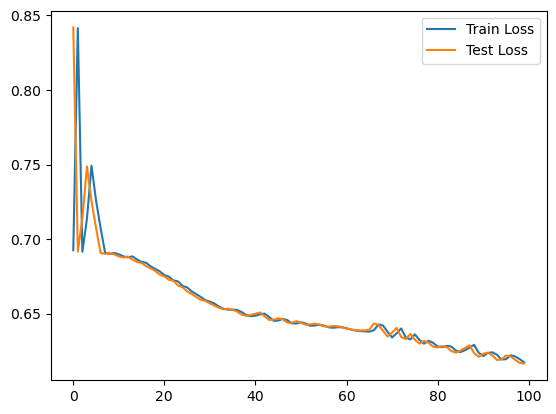

F1:0.6877224009716393
Accuracy:0.6669204545454546
Confusion Matrix:
[[52827 29918]
 [28704 64551]]

Learning Rate: 0.168341
Epoch 1/100, Train Loss: 0.6931846141815186, Test Loss: 0.7836170792579651
Epoch 2/100, Train Loss: 0.7840520739555359, Test Loss: 0.7836170792579651
Epoch 3/100, Train Loss: 0.7840520739555359, Test Loss: 0.7836170792579651
Epoch 4/100, Train Loss: 0.7840520739555359, Test Loss: 0.7836170792579651
Epoch 5/100, Train Loss: 0.7840520739555359, Test Loss: 0.7836170792579651
Epoch 6/100, Train Loss: 0.7840520739555359, Test Loss: 0.7836170792579651
Epoch 7/100, Train Loss: 0.7840520739555359, Test Loss: 0.7836170792579651
Epoch 8/100, Train Loss: 0.7840520739555359, Test Loss: 0.7836170792579651
Epoch 9/100, Train Loss: 0.7840520739555359, Test Loss: 0.7836170792579651
Epoch 10/100, Train Loss: 0.7840520739555359, Test Loss: 0.7836170792579651
Epoch 11/100, Train Loss: 0.7840520739555359, Test Loss: 0.7836170792579651
Epoch 12/100, Train Loss: 0.7840520739555359, Tes

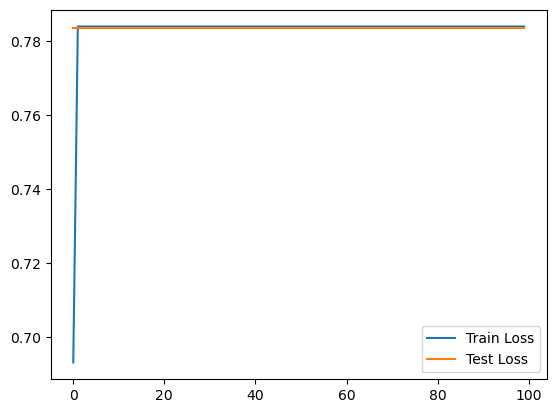

F1:0.6926890865536388
Accuracy:0.5298579545454546
Confusion Matrix:
[[    0 82745]
 [    0 93255]]



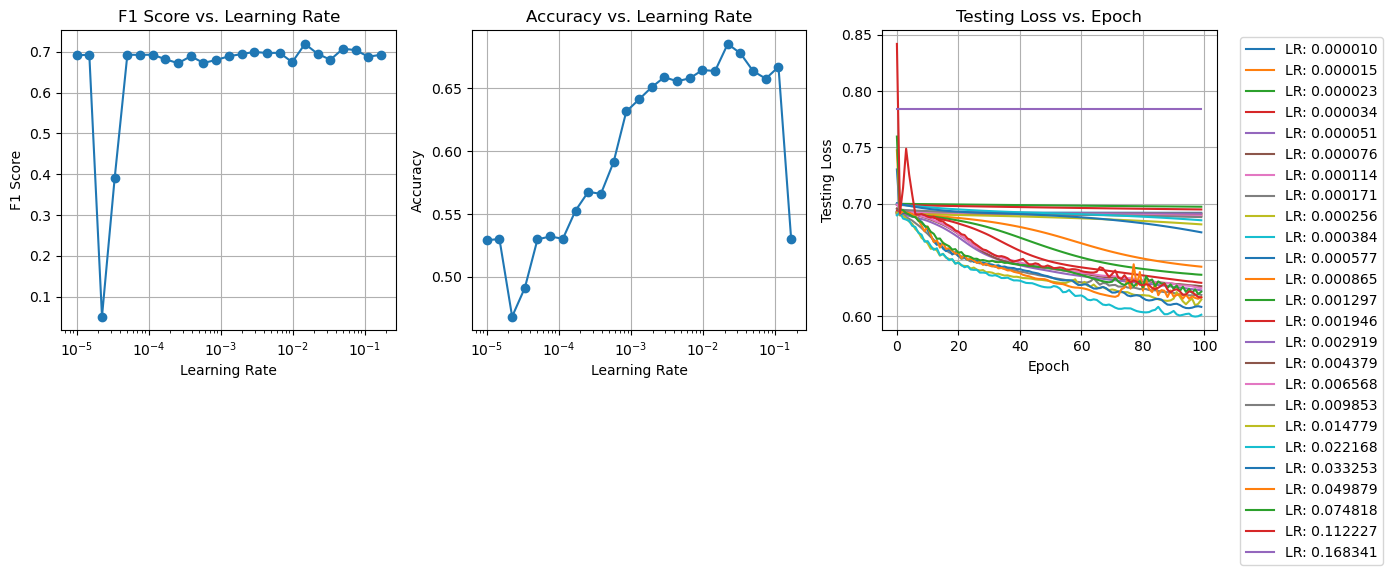

In [4]:
import matplotlib.pyplot as plt

lr_values = []
f1_scores = []
accuracies = []
test_losses_list = []

lr = 0.00001
while lr < 0.2:
    print(f"Learning Rate: {lr:.6f}")
    lr_values.append(lr)
    
    hidden_size = 30
    model = mlp.MLP_mach1(28, hidden_size)
    
    # Set the criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    n_epochs = 100
    
    # Train the model using our function
    train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
    
    # Make predictions on the validation set
    f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
    
    # Store the results
    f1_scores.append(f1)
    accuracies.append(acc)
    test_losses_list.append(test_losses)
    
    # Print the results
    print("F1:" + str(f1))
    print("Accuracy:" + str(acc))
    print("Confusion Matrix:")
    print(cm)
    print()  # Add a blank line for separation
    
    lr += lr / 2

# Plot the results
plt.figure(figsize=(14, 5))

# Plot F1 scores
plt.subplot(1, 3, 1)
plt.plot(lr_values, f1_scores, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Learning Rate')
plt.grid(True)

# Plot accuracies
plt.subplot(1, 3, 2)
plt.plot(lr_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate')
plt.grid(True)

# Plot testing losses
plt.subplot(1, 3, 3)
for i, test_losses in enumerate(test_losses_list):
    plt.plot(range(len(test_losses)), test_losses, label=f'LR: {lr_values[i]:.6f}')
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.title('Testing Loss vs. Epoch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.8)  # Adjust the right margin to make space for the legend
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
# Which learning rate is the best?
best_lr = lr_values[np.argmax(f1_scores)]
print(f"The best learning rate is: {best_lr:.6f}")

The best learning rate is: 0.009853


Epoch 1/100, Train Loss: 0.6917847394943237, Test Loss: 0.690656304359436
Epoch 2/100, Train Loss: 0.6907647252082825, Test Loss: 0.6890964508056641
Epoch 3/100, Train Loss: 0.6894295811653137, Test Loss: 0.6874492168426514
Epoch 4/100, Train Loss: 0.6881676316261292, Test Loss: 0.685097336769104
Epoch 5/100, Train Loss: 0.6862054467201233, Test Loss: 0.682166337966919
Epoch 6/100, Train Loss: 0.6837232708930969, Test Loss: 0.6786639094352722
Epoch 7/100, Train Loss: 0.681274950504303, Test Loss: 0.674452543258667
Epoch 8/100, Train Loss: 0.6781654953956604, Test Loss: 0.6697661280632019
Epoch 9/100, Train Loss: 0.6748629808425903, Test Loss: 0.6648595929145813
Epoch 10/100, Train Loss: 0.6715644001960754, Test Loss: 0.6611517667770386
Epoch 11/100, Train Loss: 0.6696828603744507, Test Loss: 0.6611748337745667
Epoch 12/100, Train Loss: 0.6697683930397034, Test Loss: 0.6561025381088257
Epoch 13/100, Train Loss: 0.6661772727966309, Test Loss: 0.6549273729324341
Epoch 14/100, Train Loss: 

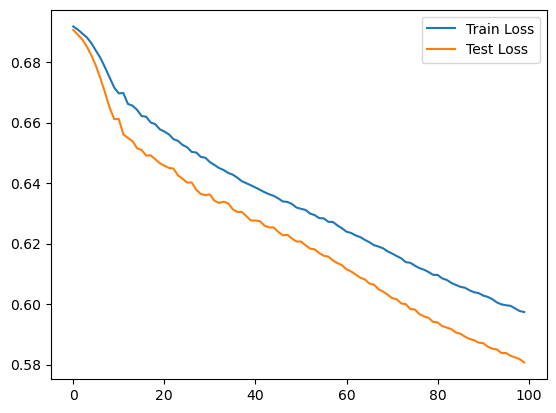

F1:0.7100413529848372
Accuracy:0.68925
Confusion Matrix:
[[54344 28530]
 [26162 66964]]


In [8]:
# Now lets see how our mach2 model does
# Set the size for four hidden layers and the dropout rate
model2 = mlp.MLP_mach2(28, 300, 220, 140, 80, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
# Lower learning rate with the adam optimizeer made the models accuracy better by over 10%
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)
# Only trained for 100 epochs because it will be too slow otherwise. We can see that the training and testing losses are still decreasing
# so, we can use the same hyperparameters and train for more epochs on the GPU.
n_epochs = 100
# Train the model using our function
train_losses, test_losses = mlp.train_model(model2, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model2, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Once the models I was testing got as big as the one above I moved to training using slurm jobs on City's Hyperion. This also allowed me to use a larger amount of training data.